# Exploratory Data Analysis

It is the process of data cleaning and data visualisation to identify and analyze different patterns and relationships within the dataset.

The dataset here consists of a csv file of insurance related data and has the following columns :<br>
    1. age<br>
    2. sex<br>
    3. bmi<br>
    4. children<br>
    5. smoker<br>
    6. region<br>
    7. charges

## Importing libraries and dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy
#setting the default seaborn style for our plots
sns.set()

In [4]:
# read the dataset
insurance_df = pd.read_csv('insurance-data.csv')
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# check all the columns and their data types
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Checking for the missing values and outliers

In [6]:
#missing values
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

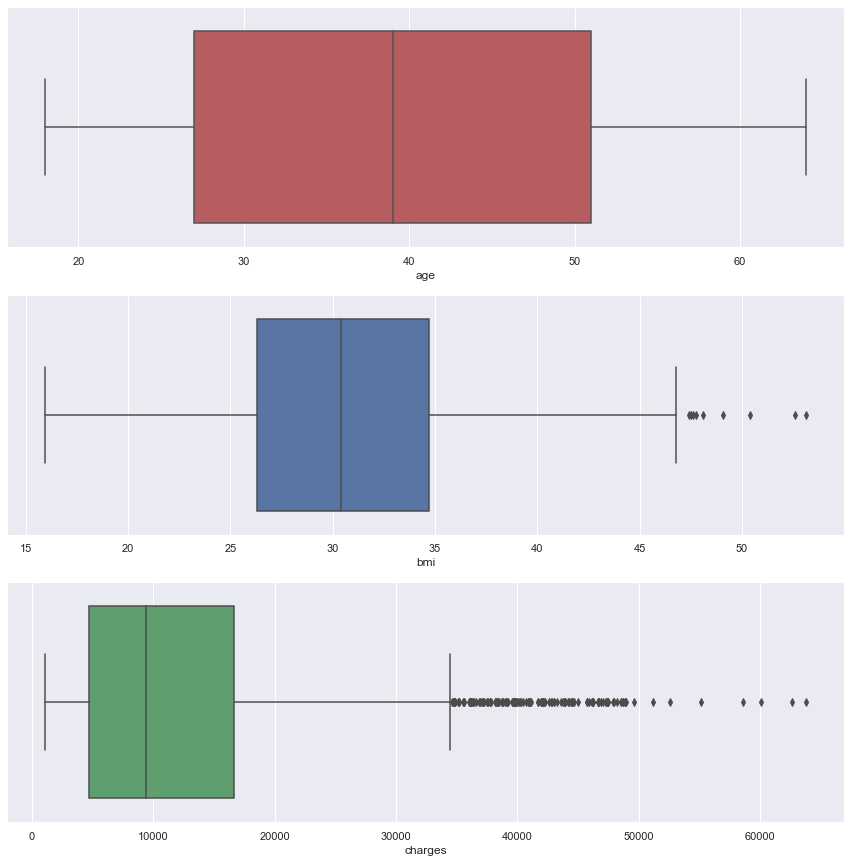

In [7]:
#checking for outliers can be done using boxplots
plt.figure(figsize = (15,15))
plt.subplot(3,1,1)
sns.boxplot(x = insurance_df.age , color = 'r')

plt.subplot(3,1,2)
sns.boxplot(x = insurance_df.bmi , color = 'b')

plt.subplot(3,1,3)
sns.boxplot(x = insurance_df.charges , color = 'g')

plt.show()

The data for bmi and charges have many outliers whereas data for age have none.

In [8]:
# statistical summary of dataset
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


We can see the min and max values for different columns including mean and standard deviation of the columns.

## Visual Methods to Analyze data

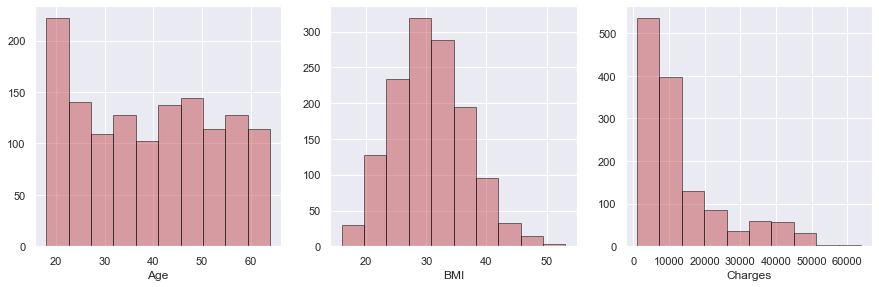

In [11]:
# histogram plots to visualize data
plt.figure(figsize = (15,15))
plt.subplot(3,3,1)
plt.hist(insurance_df.age , color = 'r' , edgecolor = 'black' , alpha = 0.5)
plt.xlabel('Age')

plt.subplot(3,3,2)
plt.hist(insurance_df.bmi , color = 'r' , edgecolor = 'black' , alpha = 0.5)
plt.xlabel('BMI')

plt.subplot(3,3,3)
plt.hist(insurance_df.charges , color = 'r' , edgecolor = 'black' , alpha = 0.5)
plt.xlabel('Charges')

plt.show()

In [13]:
# showing the skewness of the variables
skewness = pd.DataFrame({'skewness' : [stats.skew(insurance_df.age),stats.skew(insurance_df.bmi),stats.skew(insurance_df.charges)]},index=['age','bmi','charges'])
skewness

,skewness
age,0.055610
bmi,0.283729
charges,1.514180


Thus from this we can conclude that :<br>
    1. Age data is not skewed at all.<br>
    2. BMI data is less skewed.<br>
    3. Charges data is much skewed.

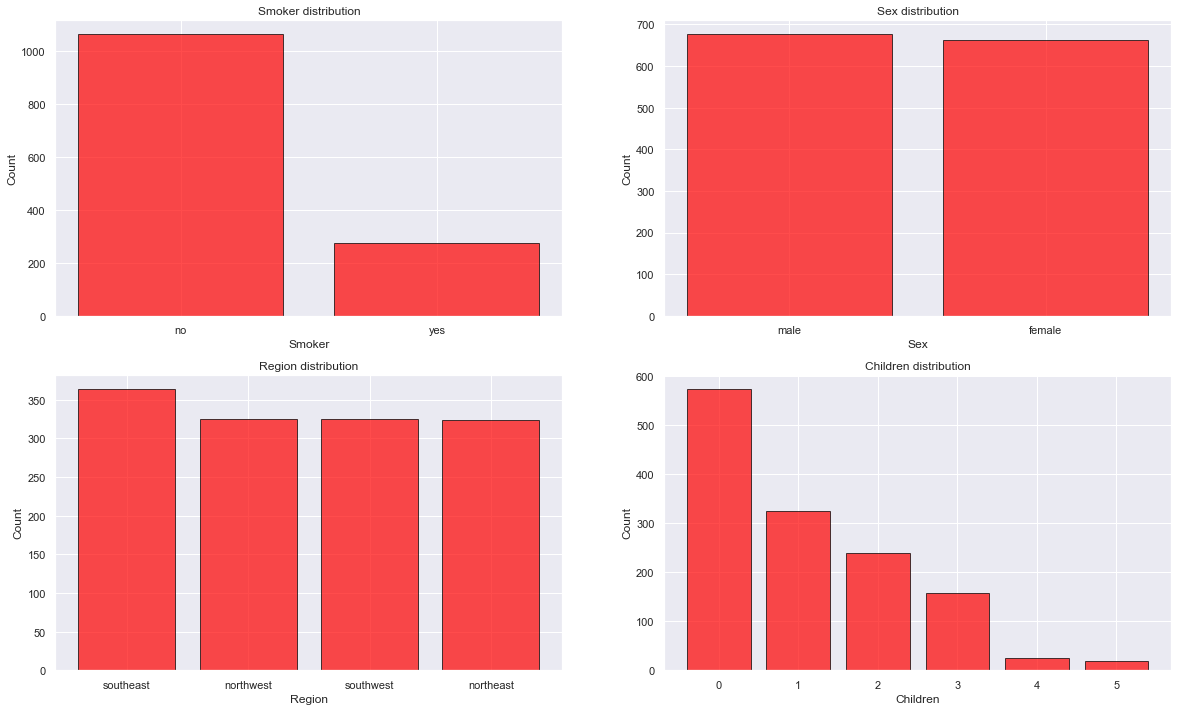

In [16]:
#visualising data to make analysis

plt.figure(figsize = (20,25))

x = insurance_df.smoker.value_counts().index  #values for x-axis
y = [insurance_df['smoker'].value_counts()[i] for i in x] # Count of each class on y-axis

plt.subplot(4,2,1)
plt.bar(x,y,align = 'center',color='red',edgecolor='black',alpha = 0.7)
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.title('Smoker distribution')

x = insurance_df.sex.value_counts().index  #values for x-axis
y = [insurance_df['sex'].value_counts()[i] for i in x] # Count of each class on y-axis

plt.subplot(4,2,2)
plt.bar(x,y,align = 'center',color='red',edgecolor='black',alpha = 0.7)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Sex distribution')

x = insurance_df.region.value_counts().index  #values for x-axis
y = [insurance_df['region'].value_counts()[i] for i in x] # Count of each class on y-axis

plt.subplot(4,2,3)
plt.bar(x,y,align = 'center',color='red',edgecolor='black',alpha = 0.7)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Region distribution')

x = insurance_df.children.value_counts().index  #values for x-axis
y = [insurance_df['children'].value_counts()[i] for i in x] # Count of each class on y-axis

plt.subplot(4,2,4)
plt.bar(x,y,align = 'center',color='red',edgecolor='black',alpha = 0.7)
plt.xlabel('Children')
plt.ylabel('Count')
plt.title('Children distribution')

plt.show()

Thus we can conclude :<br>
    1. There are majority of non-smokers.<br>
    2. There is an even gender distribution.<br>
    3. Region data is also almost evenly distributed.<br>
    4. Majority of the count has less than 3 children.

In [17]:
# Label encoding of data before the pair-plot as pair plot ignores strings.
insurance_df_encoded = copy.deepcopy(insurance_df)
insurance_df_encoded.loc[:,['sex', 'smoker', 'region']] = insurance_df_encoded.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform)
insurance_df_encoded.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


<Figure size 1440x1440 with 0 Axes>

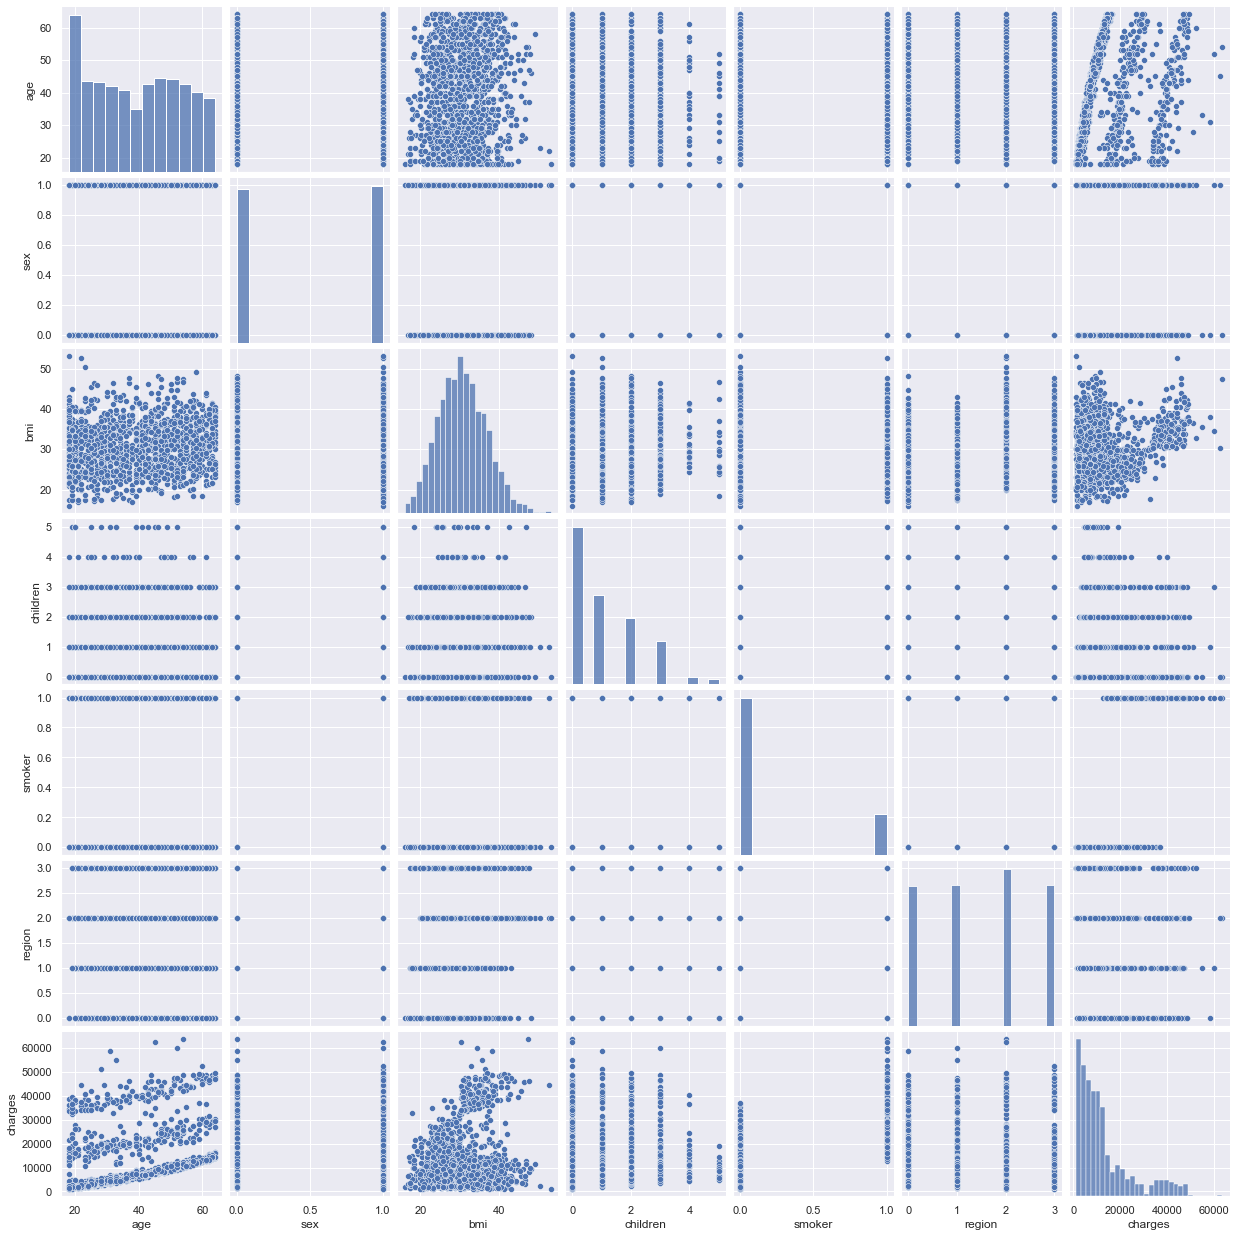

In [18]:
plt.figure(figsize = (20,20))
sns.pairplot(insurance_df_encoded)
plt.show()

# Analyzing trends and relationships in the data

In [19]:
# Do charges of people who smoke differ significantly from the people who don't?
print("Do charges of people who smoke differ significantly from the people who don't?")
insurance_df.smoker.value_counts()

Do charges of people who smoke differ significantly from the people who don't?


no     1064
yes     274
Name: smoker, dtype: int64

C:\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


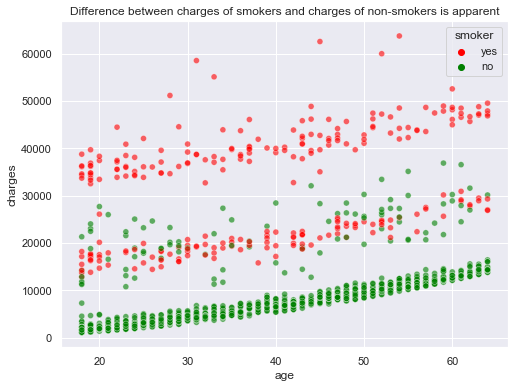

In [20]:
plt.figure(figsize=(8,6))
sns.scatterplot(insurance_df.age, insurance_df.charges,hue=insurance_df.smoker,palette= ['red','green'] ,alpha=0.6)
plt.title("Difference between charges of smokers and charges of non-smokers is apparent")
plt.show()

C:\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='charges'>

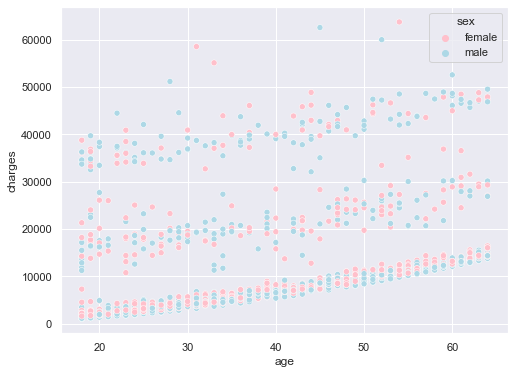

In [21]:
plt.figure(figsize=(8,6))
sns.scatterplot(insurance_df.age, insurance_df.charges,hue=insurance_df.sex,palette= ['pink','lightblue'] )

Thus it is evident that :<br>
    1. Smokers charge more than the non-smokers.<br>
    2. There is not much dependency of the charges on gender.

In [22]:
# T-test to check dependency of smoking on charges
Ho = "Charges of smoker and non-smoker are same"   # Stating the Null Hypothesis
Ha = "Charges of smoker and non-smoker are not the same"   # Stating the Alternate Hypothesis

x = np.array(insurance_df[insurance_df.smoker == 'yes'].charges)  # Selecting charges corresponding to smokers as an array
y = np.array(insurance_df[insurance_df.smoker == 'no'].charges) # Selecting charges corresponding to non-smokers as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

Charges of smoker and non-smoker are not the same as the p_value (8.271435842177219e-283) < 0.05


In [23]:
#Does bmi of males differ significantly from that of females?
print ("Does bmi of males differ significantly from that of females?")
insurance_df.sex.value_counts()   #Checking the distribution of males and females

Does bmi of males differ significantly from that of females?


male      676
female    662
Name: sex, dtype: int64

In [24]:
# T-test to check dependency of bmi on gender
Ho = "Gender has no effect on bmi"   # Stating the Null Hypothesis
Ha = "Gender has an effect on bmi"   # Stating the Alternate Hypothesis

x = np.array(insurance_df[insurance_df.sex == 'male'].bmi)  # Selecting bmi values corresponding to males as an array
y = np.array(insurance_df[insurance_df.sex == 'female'].bmi) # Selecting bmi values corresponding to females as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round()}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Gender has no effect on bmi as the p_value (0.09) > 0.05


In [25]:
#Is the proportion of smokers significantly different in different genders?


# Chi_square test to check if smoking habits are different for different genders
Ho = "Gender has no effect on smoking habits"   # Stating the Null Hypothesis
Ha = "Gender has an effect on smoking habits"   # Stating the Alternate Hypothesis

crosstab = pd.crosstab(insurance_df['sex'],insurance_df['smoker'])  # Contingency table of sex and smoker attributes

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab

Gender has an effect on smoking habits as the p_value (0.007) < 0.05


smoker,no,yes
sex,,
female,547,115
male,517,159


In [26]:
# Chi_square test to check if smoking habits are different for people of different regions
Ho = "Region has no effect on smoking habits"   # Stating the Null Hypothesis
Ha = "Region has an effect on smoking habits"   # Stating the Alternate Hypothesis

crosstab = pd.crosstab(insurance_df['smoker'], insurance_df['region'])  # Contingency table of sex and smoker attributes

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab

Region has no effect on smoking habits as the p_value (0.062) > 0.05


region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


In [27]:
# Is the distribution of bmi across women with no children, one child and two children, the same ?
# Test to see if the distributions of bmi values for females having different number of children, are significantly different

Ho = "No. of children has no effect on bmi"   # Stating the Null Hypothesis
Ha = "No. of children has an effect on bmi"   # Stating the Alternate Hypothesis


female_df = copy.deepcopy(insurance_df[insurance_df['sex'] == 'female'])

zero = female_df[female_df.children == 0]['bmi']
one = female_df[female_df.children == 1]['bmi']
two = female_df[female_df.children == 2]['bmi']


f_stat, p_value = stats.f_oneway(zero,one,two)


if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

No. of children has no effect on bmi as the p_value (0.716) > 0.05
